# Analysis on the US Predsidental Elections 

## Introduction 

Every four years on the first Tuesday in November the presidential election in United States takes place. US citizens who have registered to vote will indirectly elect the next President and Vice President. With the U.S being the world’s largest economy and a military superpower, the elections affect the financial markets on a global scale. Around 138 million Americans voted in the 2016 election and this only makes up 58.1% of the voting-eligible population. Those individuals who have not voted in the past, have still been impacted by the decisions made once the election has ended. With the elections having such drastic influences on both a national and global scale, it is crucial that in the US voting for the elections is made compulsory for all those who are eligible. The Rational Actor model, The Network model and the Markov model can be used to understand the logic and facts around voter participation in the past and use this information to draw scenarios on what may occur in the upcoming elections. Using conceptual model thinking, it is crucial that all individuals understand the benefits of voting in a presidential election and the negatives of not voting.  

In [49]:
import numpy as np 
import pandas as pd
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [50]:
dfa = "Presidential_Data.csv"

In [51]:
election = pd.read_csv(dfa)

In [52]:
election.head()

,State,2016 Total Advance elections,2020 Total Advance elections,Change,Region,Democrats Returned Ballots,Republican Returned Ballots,Minor Returned Ballots,No Party Affilation Returned Ballots,Total Ballots,...,Democrats Requested Ballots,Republicans Requested Ballots,Minor Requested Ballots,No Part Affilation Requested Ballots,Total Requested Ballots,Democrats Return Rate,Republicans Return Rate,Minor Return Rate,No Party Affilation Return Rate,Total Return Rate
0,AL,2399,221635,9139%,California,5540348.0,2455280.0,NaN,2583740.0,10579368.0,...,2384920.0,1373492.0,75087.0,2220497.0,6053996.0,59.3,58.9,28.80,40.8,52.000
1,AK,51803,139096,169%,Colorado,852266.0,706157.0,32936.0,930216.0,2521575.0,...,1215517.0,1110614.0,75852.0,1709243.0,4111226.0,70.1,63.6,43.40,54.4,61.300
2,AZ,1661874,2302756,39%,Connecticut,287565.0,91772.0,8486.0,203470.0,591293.0,...,335438.0,110631.0,10476.0,249829.0,706374.0,85.7,83.0,81.00,81.4,83.000
3,AR,590667,804335,36%,Florida,3410789.0,3315884.0,119812.0,1854160.0,8700645.0,...,210213.0,246246.0,15113.0,24134.0,495706.0,42.4,24.3,23.40,56.2,36.575
4,CA,5294036,10579368,100%,Georgia,132403.0,113134.0,5204.0,2312.0,253053.0,...,134434.0,245246.0,13571.0,135135.0,528386.0,81.2,54.2,46.26,NaN,NaN


##### The data colleted above reflects information on the ballots and votes that have calculated in each region. The data shows where votes for each party are allocated. It also show comparsions between data in 2016 and the current 2020 elections.

### Description of the Data Collected 

In [53]:
election.describe()

,2016 Total Advance elections,2020 Total Advance elections,Democrats Returned Ballots,Republican Returned Ballots,Minor Returned Ballots,No Party Affilation Returned Ballots,Total Ballots,Democrats Frequ.Ditributions Rate,Republican Frequ.Ditributions Rate,Minor Frequ.Ditributions Rate,...,Democrats Requested Ballots,Republicans Requested Ballots,Minor Requested Ballots,No Part Affilation Requested Ballots,Total Requested Ballots,Democrats Return Rate,Republicans Return Rate,Minor Return Rate,No Party Affilation Return Rate,Total Return Rate
count,5.100000e+01,5.100000e+01,2.100000e+01,2.100000e+01,17.000000,2.100000e+01,2.100000e+01,21.000000,21.000000,20.000000,...,2.100000e+01,2.100000e+01,21.000000,2.100000e+01,2.100000e+01,21.000000,21.000000,21.000000,20.00000,20.000000
mean,9.283806e+05,1.801834e+06,9.913631e+05,6.406902e+05,18918.235294,4.807532e+05,2.141376e+06,44.899048,33.023810,2.491000,...,6.579222e+05,4.500346e+05,52085.142857,4.042619e+05,1.564904e+06,70.376190,66.667619,60.003810,60.21000,66.090500
std,1.363513e+06,2.291778e+06,1.300367e+06,8.170862e+05,27893.021156,6.873240e+05,2.731205e+06,9.678234,8.888189,5.427255,...,7.305209e+05,4.119581e+05,86121.939319,7.335533e+05,1.810428e+06,15.889365,17.506808,20.504146,21.36135,16.497967
min,2.399000e+03,1.012480e+05,6.451400e+04,9.177200e+04,910.000000,2.312000e+03,2.024640e+05,31.900000,15.500000,0.220000,...,9.143700e+04,2.465300e+04,2235.000000,2.525000e+03,1.880190e+05,42.400000,24.300000,23.400000,25.20000,36.575000
25%,1.063310e+05,3.570025e+05,2.614120e+05,2.021510e+05,4512.000000,7.711300e+04,5.912930e+05,39.200000,25.700000,0.550000,...,2.102130e+05,2.356430e+05,13155.000000,5.523000e+03,5.237070e+05,59.300000,57.900000,46.200000,40.80000,54.045000
50%,4.803560e+05,9.511780e+05,4.315590e+05,3.709560e+05,8486.000000,1.863770e+05,1.026318e+06,43.500000,33.000000,0.900000,...,3.356570e+05,2.462460e+05,17851.000000,2.413400e+04,7.149030e+05,74.200000,64.620000,64.600000,60.50000,61.227500
75%,1.058116e+06,2.353555e+06,1.199203e+06,5.526270e+05,21656.000000,4.828730e+05,2.404354e+06,48.100000,38.100000,1.500000,...,8.726430e+05,7.623100e+05,62012.000000,2.498290e+05,1.299489e+06,81.700000,78.350000,73.600000,79.62500,78.950000
max,6.511712e+06,1.057937e+07,5.540348e+06,3.315884e+06,119812.000000,2.583740e+06,1.057937e+07,67.100000,47.800000,25.000000,...,2.384920e+06,1.373492e+06,346535.000000,2.220497e+06,6.053996e+06,93.000000,96.100000,96.700000,94.60000,96.200000


The above shows the count, mean, standard deviation, minimum quartile, the percentile [25%,50%,75%] and the max quartile.

In [54]:
election.dtypes

State                                           object
2016 Total Advance elections                     int64
2020 Total Advance elections                     int64
Change                                          object
Region                                          object
Democrats Returned Ballots                     float64
Republican  Returned Ballots                   float64
Minor  Returned Ballots                        float64
No Party Affilation  Returned Ballots          float64
Total Ballots                                  float64
Democrats Frequ.Ditributions Rate              float64
Republican Frequ.Ditributions Rate             float64
Minor Frequ.Ditributions Rate                  float64
No Party Affilation Frequ.Ditributions Rate    float64
Total Percentage of Frequ.Ditributions Rate    float64
Democrats Requested Ballots                    float64
Republicans Requested Ballots                  float64
Minor Requested Ballots                        float64
No Part Af

In [55]:
print(election.columns)

Index(['State', '2016 Total Advance elections', '2020 Total Advance elections',
       'Change', 'Region ', 'Democrats Returned Ballots ',
       'Republican  Returned Ballots ', 'Minor  Returned Ballots ',
       'No Party Affilation  Returned Ballots ', 'Total Ballots',
       'Democrats Frequ.Ditributions Rate',
       'Republican Frequ.Ditributions Rate', 'Minor Frequ.Ditributions Rate',
       'No Party Affilation Frequ.Ditributions Rate',
       'Total Percentage of Frequ.Ditributions Rate',
       'Democrats Requested Ballots ', 'Republicans Requested Ballots ',
       'Minor Requested Ballots ', 'No Part Affilation Requested Ballots ',
       'Total Requested Ballots', 'Democrats Return Rate ',
       'Republicans  Return Rate ', 'Minor Return Rate ',
       'No Party Affilation Return Rate', 'Total Return Rate '],
      dtype='object')


In [56]:
print(election.shape)

(51, 25)


In [57]:
print(election.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 25 columns):
State                                          51 non-null object
2016 Total Advance elections                   51 non-null int64
2020 Total Advance elections                   51 non-null int64
Change                                         51 non-null object
Region                                         21 non-null object
Democrats Returned Ballots                     21 non-null float64
Republican  Returned Ballots                   21 non-null float64
Minor  Returned Ballots                        17 non-null float64
No Party Affilation  Returned Ballots          21 non-null float64
Total Ballots                                  21 non-null float64
Democrats Frequ.Ditributions Rate              21 non-null float64
Republican Frequ.Ditributions Rate             21 non-null float64
Minor Frequ.Ditributions Rate                  20 non-null float64
No Party Affilation Frequ.Ditribu

In [58]:
election['Democrats Frequ.Ditributions Rate'].value_counts(normalize=True)

44.90    0.095238
48.90    0.047619
39.20    0.047619
43.50    0.047619
61.70    0.047619
39.60    0.047619
41.70    0.047619
40.78    0.047619
66.20    0.047619
33.80    0.047619
35.30    0.047619
48.10    0.047619
67.10    0.047619
31.90    0.047619
44.20    0.047619
48.60    0.047619
46.40    0.047619
36.70    0.047619
37.90    0.047619
41.50    0.047619
Name: Democrats Frequ.Ditributions Rate, dtype: float64

In [59]:
election['Republican Frequ.Ditributions Rate'].value_counts(normalize=True)

28.0    0.095238
25.7    0.095238
29.7    0.047619
15.5    0.047619
35.0    0.047619
33.0    0.047619
46.0    0.047619
32.5    0.047619
23.0    0.047619
36.4    0.047619
34.9    0.047619
44.4    0.047619
46.2    0.047619
47.8    0.047619
38.1    0.047619
37.4    0.047619
23.7    0.047619
40.1    0.047619
22.4    0.047619
Name: Republican Frequ.Ditributions Rate, dtype: float64

## Graphs 

In [65]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py 
import plotly.graph_objs as go 
from plotly.figure_factory import create_table 

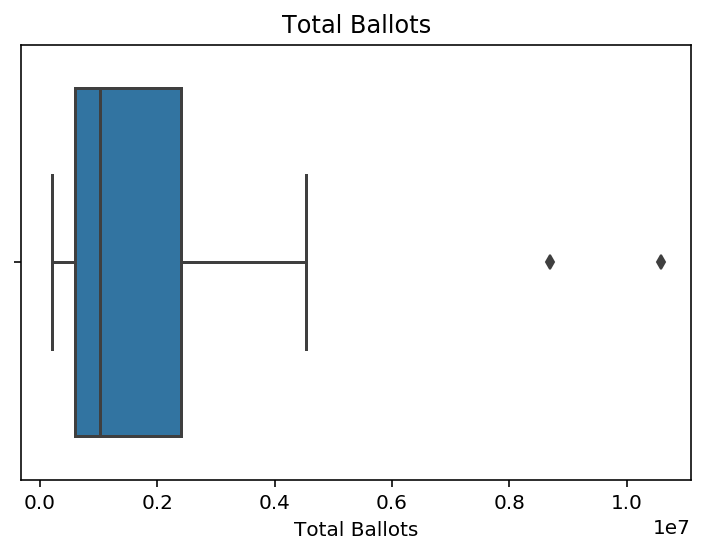

In [79]:
sns.boxplot(election['Total Ballots'])
plt.title('Total Ballots')
plt.show()

In [77]:
crash.plot(x='Total Return Rate' y='Democrats Return Rate', style='0')
plt.show()

SyntaxError: invalid syntax (<ipython-input-77-138bb89d72c0>, line 1)

In [80]:
sns.distplot(election['Democrats Return Rate']);

KeyError: 'Democrats Return Rate'

fig = px.line(election, x = 'Total Return Rate', y = 'Total Ballots', title='Apple Share Prices over time (2014)')
fig.show()

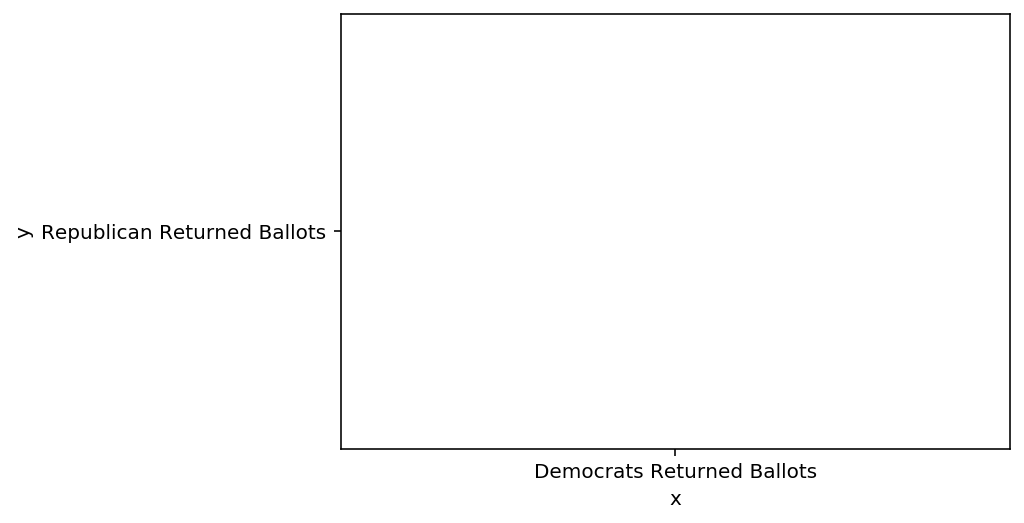

In [25]:
plt.plot(x,y, label='Region')
plt.xlabel('x')
plt.ylabel('y')
plt.title('')
plt.show()

In [78]:
election['Region']
sns.lmplot(x='Democrats Returned Ballots', y='Democrats Frequ.Ditributions Rate', data=election,
           fit_reg=False, # No regression line
           hue='Region')

KeyError: 'Region'